# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:

# student details 1: Liran C. 1651
# student details 2: Daniel L. 3935


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The goal of this project is to build a classification model that predicts whether a passenger survived the Titanic disaster based on various features such as age, sex, passenger class, and more. This is a supervised learning problem where the target variable is binary (Survived: 0 or 1). The dataset comes from the well-known Titanic competition and includes a training set with known outcomes and a test set without them. We perform exploratory data analysis (EDA), feature engineering, model selection using grid search with cross-validation, and final prediction on the test set. The project follows a structured machine learning pipeline as outlined in the course instructions.


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
#loading csv files
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

In [10]:
#printing first 5 rows of the Train Dataset
print("Train Data:")
print(train_df.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [11]:
#printing first 5 rows of the Test Dataset
print("\nTest Data:")
print(test_df.head())


Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


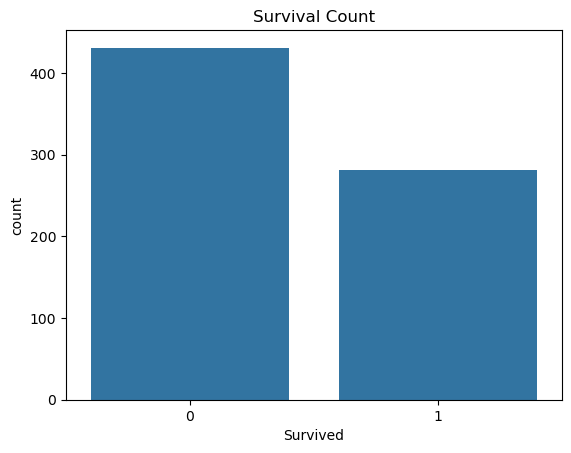

In [12]:
#graph that shows how many people survived
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()

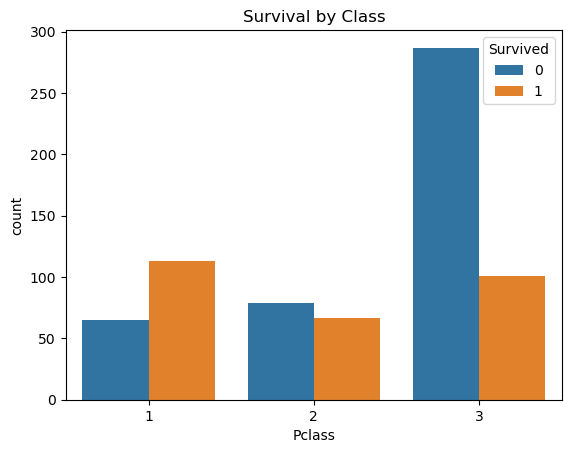

In [13]:
#countplot of age against survived by class
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival by Class")
plt.show()

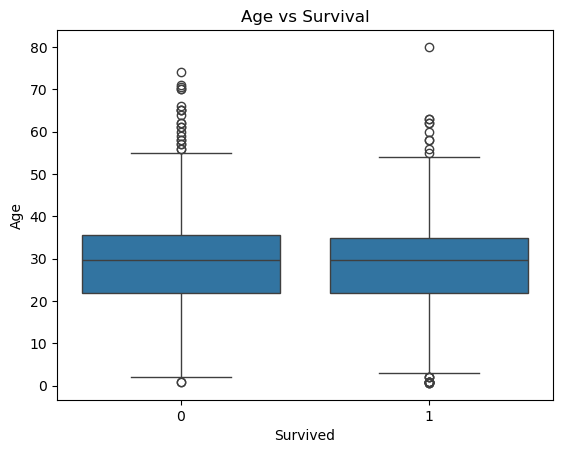

In [14]:
#boxplot of age against survived
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Age vs Survival")
plt.show()

In [15]:
def preprocess(df):
    df = df.copy() #prevents damaging original file
    if 'Sex' in df.columns:
        df['Sex'] = LabelEncoder().fit_transform(df['Sex']) #converting 'sex' column to numerical values
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #filling missing values in embarked column
        df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
    if 'Name' in df.columns:
        df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
        df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                           'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        df['Title'] = LabelEncoder().fit_transform(df['Title'])
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #creating new feature: family size
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    if 'Age' in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median()) #filling missing age values with the median
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median()) #filling missing fare values with the median
    drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId'] #unnecessary columns that will be droped
    return df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#creating X and Y varaibles for training
X = preprocess(train_df.drop(columns=['Survived'], errors='ignore'))
y = train_df["Survived"]
X_test_final = preprocess(test_df.copy())

## Part 3 - Experiments
You could add as many code cells as needed

In [17]:
#defining the models to execute
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}
#defining ranges of grids for each model
param_grid = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    }
}

best_models = {} #dictionary for saving best models

#cross validation
for name, model in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='f1_macro')
    grid.fit(X, y)
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    best_models[name] = grid.best_estimator_ #saving the best model

#comparing model results
results = []
for name, model in best_models.items():
    score = cross_val_score(model, X, y, cv=5, scoring='f1_macro').mean()
    results.append({"Model": name, "F1_macro (CV avg)": score})

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values(by="F1_macro (CV avg)", ascending=False))


Tuning Logistic Regression...
Best Params: {'C': 10, 'solver': 'liblinear'}
Best CV Score: 0.7866081741281948

Tuning Random Forest...
Best Params: {'max_depth': 10, 'n_estimators': 100}
Best CV Score: 0.8085456722116173

Model Comparison:
                 Model  F1_macro (CV avg)
1        Random Forest           0.804255
0  Logistic Regression           0.786608


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [22]:
#training the best model
best_model = results_df.sort_values(by="F1_macro (CV avg)", ascending=False).iloc[0]['Model']
final_model = best_models[best_model]
final_model.fit(X, y)

RandomForestClassifier(max_depth=10)

## Part 5 - Apply on test and show model performance estimation

In [26]:
X_test_final = X_test_final[X.columns]
y_pred = final_model.predict(X_test_final) #predicting on the test set

print("\nFirst 5 Predictions:") #printing first five predictions
print(y_pred[:5])


First 5 Predictions:
[0 0 0 1 1]
